In [1]:
import pandas
from matplotlib import pyplot, font_manager, rc
from numpy import nan
import seaborn

In [2]:
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

## seaborn 에서 타이타닉 데이터셋 가져오기

In [6]:
titanic = seaborn.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 나이에 따른 요금, 회귀선이 있는 산점도 그리기
- regplot

<AxesSubplot:xlabel='age', ylabel='fare'>

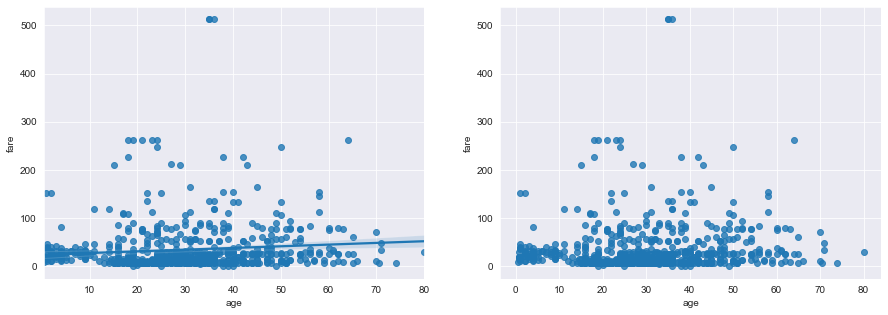

In [12]:
# 테마 설정
seaborn.set_style('darkgrid')

# 그래프 객체 생성
figure = pyplot.figure(figsize=(15,5))
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

# 그래프 그리기
seaborn.regplot(ax = ax1, x = 'age', y = 'fare', data = titanic)
seaborn.regplot(ax = ax2, x = 'age', y = 'fare', data = titanic, fit_reg=False) # 회귀선 미표시 : fit_reg=False

## 성별에 따른 등급, 히트맵으로 그리기
- heatmap

<AxesSubplot:xlabel='class', ylabel='sex'>

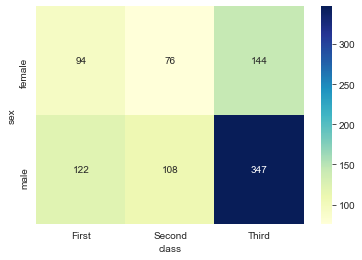

In [21]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size') # 결합함수(사이즈로 묶음) : aggfunc='size'

seaborn.heatmap(table, annot=True, fmt = 'd', # 데이터값 표시여부 , 정수형 포맷
               cmap='YlGnBu', # 컬러맵 
               )